In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import re
import h5py
from six.moves import range

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA/')

from evtid_utils import decode_eventid
from mnvtf.reader_sqlite import MnvCategoricalSQLiteReader
from mnvtf.reader_text import MnvCategoricalTextReader

In [3]:
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_rowcolnormonly
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_raw

In [4]:
h5path = '/Users/perdue/Documents/MINERvA/AI/hdf5/201801/'
h5name = h5path + 'hadmultkineimgs_127x94_me1Pmc.hdf5'
h5file = h5py.File(h5name, 'r')

In [5]:
dbpath = '/Users/perdue/Documents/MINERvA/AI/minerva_tf/predictions/201801/'
dbname = dbpath + 'mnv_st_epsilon_predictionsME1LOPMC_VALIDCHECK_model_20180323_def_chngdpad_planecodes_nclass173_trainME1LOPMC_validME1LOPMC_testME1LOPMC_optADAM_batchsz1024_nodoBatchNorm_tev.txt.gz'
n_classes = 173
reader_mc = MnvCategoricalTextReader(dbname)

In [12]:
mcgen = reader_mc.read_data_generator()
n_events = 1

In [13]:
make_file = False

if make_file:
    outfil = open('me1Pmc_valid_predcheck.csv', 'w')
    outfil.write('# eventid,predicted,true\n')

    for i, d in enumerate(mcgen):
        evtid = int(d[0])
        pred_seq = d[1]
        probs_list = d[2]
        found_idx = np.where(h5file['event_data']['eventids'][:] == evtid)[0]
        if len(found_idx):
            found_idx = found_idx[0]
            outfil.write('{},{},{}\n'.format(
                evtid, pred_seq, h5file['vtx_data']['planecodes'][found_idx][0]
            ))

    outfil.close()

In [14]:
import pandas as pd

In [17]:
evtpcodes = pd.read_csv('./me1Pmc_valid_predcheck.csv', header=0, names=['eventid', 'predicted', 'true'])

In [18]:
evtpcodes.head()

,eventid,predicted,true
0,1120070038030101,169,169
1,1120070038030903,37,37
2,1120070038031201,162,162
3,1120070038031601,122,123
4,1120070038032002,111,111


In [19]:
dfrec0 = evtpcodes[evtpcodes['predicted'] == 0]

In [20]:
len(dfrec0)

2567

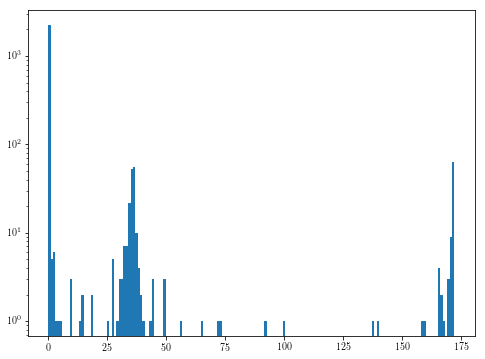

In [25]:
fig = plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(dfrec0['true'][:], bins=173, range=(0, 172))
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')

In [30]:
tidx = dfrec0['true'] > 25
tidx &=  dfrec0['true'] < 51

In [31]:
dfrec0t25_50 = dfrec0[tidx]

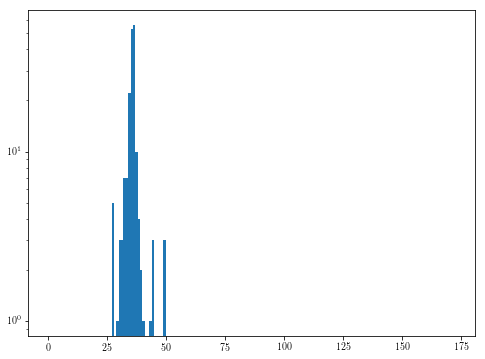

In [32]:
fig = plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(dfrec0t25_50['true'][:], bins=173, range=(0, 172))
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')

In [33]:
len(dfrec0t25_50)

181

In [35]:
for ev in dfrec0t25_50['eventid'][:20]:
    print(ev, decode_eventid(ev))

1120070038094901 ('112007', '0038', '0949', '01')
1120070039079201 ('112007', '0039', '0792', '01')
1120070216109401 ('112007', '0216', '1094', '01')
1120070217003402 ('112007', '0217', '0034', '02')
1120070219023802 ('112007', '0219', '0238', '02')
1120000240072903 ('112000', '0240', '0729', '03')
1120060480002201 ('112006', '0480', '0022', '01')
1120060481023501 ('112006', '0481', '0235', '01')
1120060481112302 ('112006', '0481', '1123', '02')
1120080086010202 ('112008', '0086', '0102', '02')
1120080086052802 ('112008', '0086', '0528', '02')
1120080087107802 ('112008', '0087', '1078', '02')
1120080089051102 ('112008', '0089', '0511', '02')
1120080089055302 ('112008', '0089', '0553', '02')
1120080089055701 ('112008', '0089', '0557', '01')
1120060120091402 ('112006', '0120', '0914', '02')
1120060123083301 ('112006', '0123', '0833', '01')
1120010389037801 ('112001', '0389', '0378', '01')
1120010390031401 ('112001', '0390', '0314', '01')
1120050251036202 ('112005', '0251', '0362', '02')
